## ДЗ №1

1. Построить модель линейной регрессии для данных из файла data.csv

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = np.loadtxt('data.csv', skiprows=1, delimiter=',')
data

array([[240000.,   3650.],
       [139800.,   3800.],
       [150500.,   4400.],
       [185530.,   4450.],
       [176000.,   5250.],
       [114800.,   5350.],
       [166800.,   5800.],
       [ 89000.,   5990.],
       [144500.,   5999.],
       [ 84000.,   6200.],
       [ 82029.,   6390.],
       [ 63060.,   6390.],
       [ 74000.,   6600.],
       [ 97500.,   6800.],
       [ 67000.,   6800.],
       [ 76025.,   6900.],
       [ 48235.,   6900.],
       [ 93000.,   6990.],
       [ 60949.,   7490.],
       [ 65674.,   7555.],
       [ 54000.,   7990.],
       [ 68500.,   7990.],
       [ 22899.,   7990.],
       [ 61789.,   8290.]])

In [3]:
x, y = data[:, 0].reshape(-1, 1), data[:, 1]

0.7329747078314965
8499.599649933216 [-0.02144896]


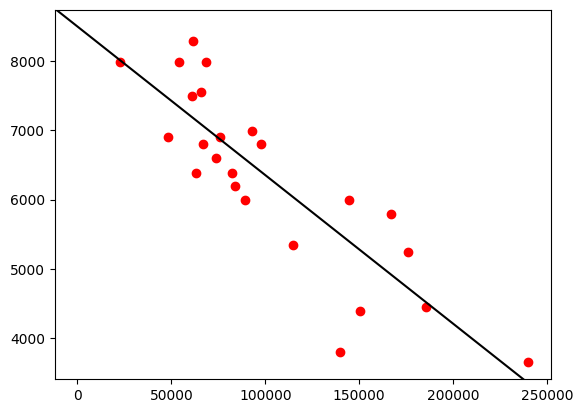

In [4]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(x, y)
print(lr.score(x, y))
print(lr.intercept_, lr.coef_)

plt.scatter(x, y, c='red')
plt.axline((0, lr.intercept_), slope=lr.coef_, c='black')

## ДЗ №2

1. Разбить датасет digits на обучающую и тестовую выборку, 85% и 15% соответственно.
2. Найти лучший классификатор (и лучшие параметры) для этого набора данных.
3. Выведите в графическом виде все примеры, где лучший классификатор ошибся.
4. Сравнить результат с классификацией датасета digits, предобработанного алгоритмом t-SNE.

Загрузим данные

In [5]:
from sklearn.datasets import load_digits

digits_dataset = load_digits()
x = digits_dataset.data
y = digits_dataset.target
print(x)
print(y)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]


Вычислим, сколько строк должно быть в обучающей выборке

In [6]:
from math import floor

train_size = floor(x.shape[0] * 0.85)
train_size

1527

Будем использовать реализацию t-SNE из OpenTSNE. Это нужно, так как реализация TSNE из sklearn не имеет метода transform, и преобразование нельзя применить к новым данным (это понадобится в задании 3 для распознавания числа)

In [7]:
%%capture
!pip install opentsne

Применим t-SNE к датасету

In [8]:
from openTSNE import TSNE

tsne = TSNE(n_components=2)
x_tsne = tsne.fit(x)
x_tsne

TSNEEmbedding([[ -1.9837878 ,  47.07121155],
               [  9.51069711, -10.62749715],
               [-14.42086622, -16.21018012],
               ...,
               [ -5.6025507 , -10.26896169],
               [-18.01791184,  14.30242341],
               [-13.1898873 ,  -5.80652111]])

Визуализируем результаты. Видно, что разным числам соответствуют разные кластеры

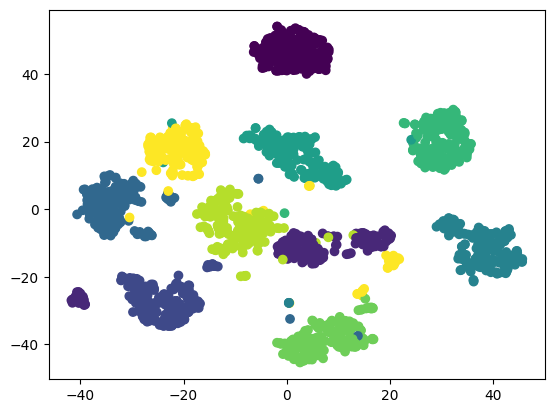

In [9]:
plt.scatter(x_tsne[:, 0], x_tsne[:, 1], c=y)

Разделим на обучающую и тестовую выборки:
- Датасет
- Датасет, предобтаботанный t-SNE
- Целевую переменную

In [10]:
x_train = x[:train_size]
x_test = x[train_size:]

x_train_tsne = x_tsne[:train_size]
x_test_tsne = x_tsne[train_size:]

y_train = y[:train_size]
y_test = y[train_size:]

Эта функция:
1. Обучает модель (если tsne=True, то на данных, предобработанных t-SNE)
2. Вычисляет значение accuracy
3. Если accuracy модели – лучшая, сохраняет модель (а также информацию о том, обучена ли модель на предобтаботанных t-SNE данных)

In [11]:
from sklearn.metrics import accuracy_score

best_accuracy = -1
best_algorithm = None
best_tsne = False

def run_classifier(classifier, tsne=False):
    global best_accuracy, best_algorithm, best_tsne

    if tsne:
        x_train_local = x_train_tsne
        x_test_local = x_test_tsne
    else:
        x_train_local = x_train
        x_test_local = x_test

    classifier.fit(x_train_local, y_train)
    prediction = classifier.predict(x_test_local)
    accuracy = accuracy_score(y_test, prediction)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_algorithm = classifier
        best_tsne = tsne

    return accuracy

Попробуем разные модели

In [12]:
from sklearn.linear_model import LogisticRegression

run_classifier(LogisticRegression(max_iter=100))

C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9111111111111111

In [13]:
run_classifier(LogisticRegression(max_iter=200), True)

C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8814814814814815

In [14]:
from sklearn.neighbors import KNeighborsClassifier

run_classifier(KNeighborsClassifier(n_neighbors=3))

0.9555555555555556

In [15]:
run_classifier(KNeighborsClassifier(n_neighbors=3), True)

0.9592592592592593

In [16]:
from sklearn.naive_bayes import GaussianNB

run_classifier(GaussianNB())

0.7777777777777778

In [17]:
run_classifier(GaussianNB(), True)

0.9296296296296296

In [18]:
from sklearn.svm import SVC

run_classifier(SVC())

0.9259259259259259

In [19]:
run_classifier(SVC(), True)

0.9444444444444444

In [20]:
from sklearn.ensemble import RandomForestClassifier

run_classifier(RandomForestClassifier(n_estimators=100, bootstrap=False, n_jobs=-1))

0.9148148148148149

In [21]:
run_classifier(RandomForestClassifier(n_estimators=100, bootstrap=False, n_jobs=-1), True)

0.9518518518518518

In [22]:
%%capture
!pip install catboost

In [23]:
from catboost import CatBoostClassifier

run_classifier(CatBoostClassifier())

Learning rate set to 0.080854
0:	learn: 2.1232085	total: 173ms	remaining: 2m 52s
1:	learn: 1.9346124	total: 177ms	remaining: 1m 28s
2:	learn: 1.7902000	total: 181ms	remaining: 1m
3:	learn: 1.6609760	total: 185ms	remaining: 46s
4:	learn: 1.5427574	total: 188ms	remaining: 37.4s
5:	learn: 1.4412863	total: 191ms	remaining: 31.7s
6:	learn: 1.3658550	total: 195ms	remaining: 27.6s
7:	learn: 1.2872218	total: 198ms	remaining: 24.6s
8:	learn: 1.2195008	total: 202ms	remaining: 22.2s
9:	learn: 1.1535292	total: 206ms	remaining: 20.4s
10:	learn: 1.0926212	total: 209ms	remaining: 18.8s
11:	learn: 1.0396298	total: 213ms	remaining: 17.5s
12:	learn: 0.9893040	total: 216ms	remaining: 16.4s
13:	learn: 0.9430253	total: 220ms	remaining: 15.5s
14:	learn: 0.8966361	total: 224ms	remaining: 14.7s
15:	learn: 0.8549227	total: 227ms	remaining: 14s
16:	learn: 0.8167400	total: 231ms	remaining: 13.4s
17:	learn: 0.7791816	total: 235ms	remaining: 12.8s
18:	learn: 0.7451788	total: 239ms	remaining: 12.4s
19:	learn: 0.713

0.9185185185185185

In [24]:
run_classifier(CatBoostClassifier(), True)

Learning rate set to 0.080854
0:	learn: 1.8500636	total: 6.05ms	remaining: 6.04s
1:	learn: 1.5650859	total: 11.4ms	remaining: 5.69s
2:	learn: 1.3682917	total: 17ms	remaining: 5.64s
3:	learn: 1.2272490	total: 22.8ms	remaining: 5.67s
4:	learn: 1.0868296	total: 28.7ms	remaining: 5.71s
5:	learn: 0.9845115	total: 34.9ms	remaining: 5.78s
6:	learn: 0.8967595	total: 40.4ms	remaining: 5.73s
7:	learn: 0.8234540	total: 45.8ms	remaining: 5.68s
8:	learn: 0.7569280	total: 51.1ms	remaining: 5.63s
9:	learn: 0.6969618	total: 56.6ms	remaining: 5.61s
10:	learn: 0.6463911	total: 62.4ms	remaining: 5.61s
11:	learn: 0.6027955	total: 68ms	remaining: 5.6s
12:	learn: 0.5640726	total: 73.6ms	remaining: 5.59s
13:	learn: 0.5282597	total: 78.9ms	remaining: 5.56s
14:	learn: 0.4944795	total: 83.8ms	remaining: 5.5s
15:	learn: 0.4644043	total: 88.8ms	remaining: 5.46s
16:	learn: 0.4359319	total: 94.3ms	remaining: 5.46s
17:	learn: 0.4096845	total: 99.6ms	remaining: 5.43s
18:	learn: 0.3874539	total: 105ms	remaining: 5.4s


0.9592592592592593

Лучшие результаты были получены с помощью KNeighborsClassifier(n_neighbors=3), обученном на предобработанных t-SNE данных.

В целом, большая часть моделей на предобработанных t-SNE данных давала лучшие результаты и обучалась быстрее.

In [25]:
best_accuracy, best_algorithm, best_tsne

(0.9592592592592593, KNeighborsClassifier(n_neighbors=3), True)

Визуализируем примеры, на которых лучший классификатор ошибся.

Для каждого примера будем указывать правильный ответ и ошибочный ответ, который дал классификатор.

In [26]:
def predict(classifier, tsne):
    x_test_local = x_test_tsne if tsne else x_test
    return classifier.predict(x_test_local)

def find_test_errors(classifier, tsne):
    prediction = predict(classifier, tsne)
    prediction_bool = prediction != y_test
    return x_test[prediction_bool], y_test[prediction_bool], prediction[prediction_bool]

test_errors, test_errors_correct_answers, test_errors_algo_answers = find_test_errors(best_algorithm, best_tsne)
test_errors

array([[ 0.,  0.,  1.,  8., 13.,  1.,  0.,  0.,  0.,  0.,  6., 16., 16.,
         9.,  0.,  0.,  0.,  1., 15., 16., 16., 10.,  0.,  0.,  0.,  6.,
        15., 14.,  6.,  0.,  0.,  0.,  0.,  3.,  7.,  6.,  6.,  0.,  0.,
         0.,  0.,  1., 10.,  2., 11.,  0.,  0.,  0.,  0.,  0.,  4., 11.,
        13.,  2.,  0.,  0.,  0.,  0.,  0.,  5., 12.,  5.,  0.,  0.],
       [ 0.,  0.,  6., 14., 16., 15.,  1.,  0.,  0.,  9., 16., 12.,  9.,
        16.,  3.,  0.,  0., 12., 16., 11., 14., 13.,  0.,  0.,  0.,  7.,
        15., 16., 14.,  0.,  0.,  0.,  0.,  0.,  2.,  8., 16.,  5.,  0.,
         0.,  0.,  0.,  0.,  6., 16.,  4.,  0.,  0.,  0.,  0.,  2., 13.,
        12.,  0.,  0.,  0.,  0.,  0.,  9., 16.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  9., 16., 16., 10.,  0.,  0.,  0.,  0.,  9.,  9.,  9.,
        15.,  0.,  0.,  0.,  0.,  0.,  0.,  6., 14.,  0.,  0.,  0.,  0.,
         0.,  2., 15.,  7.,  0.,  0.,  0.,  0.,  1., 14., 16.,  4.,  0.,
         0.,  0.,  0.,  5., 16., 16.,  8.,  0.,  0.,  0.,  

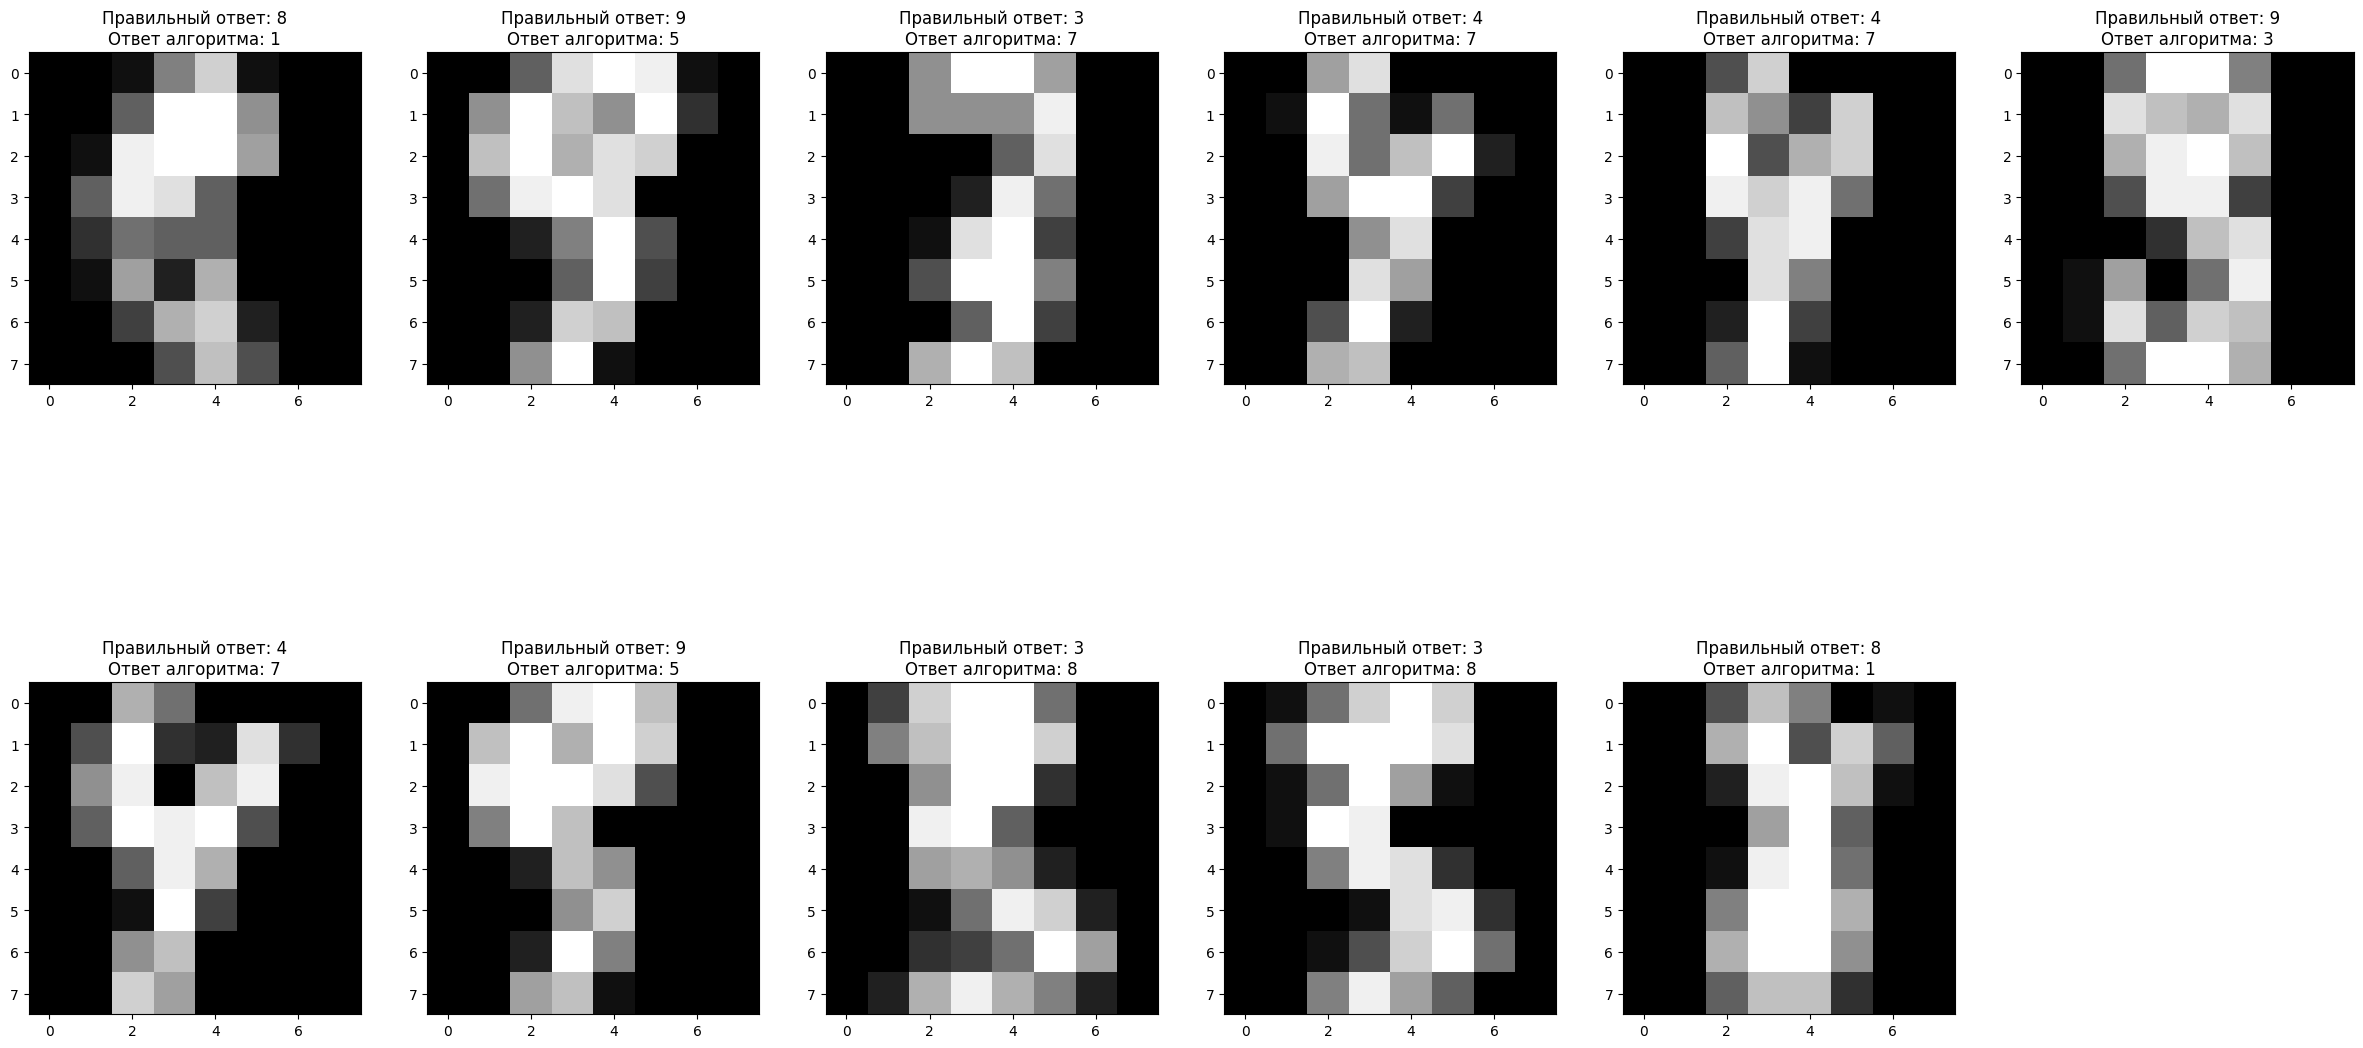

In [27]:
from math import ceil

columns = 6
rows = ceil(test_errors.shape[0] / columns)

fig = plt.figure(figsize=(30, 15))

for i in range(test_errors.shape[0]):
    fig.add_subplot(rows, columns, i + 1)
    plt.imshow(np.reshape(test_errors[i], (8, 8)), cmap=plt.cm.gray)
    #plt.axis('off')
    plt.title(f'Правильный ответ: {test_errors_correct_answers[i]}\nОтвет алгоритма: {test_errors_algo_answers[i]}')

Интересно, что многие из примеров, где лучший классификатор ошибся, действительно неоднозначны, и на них с высокой вероятностью дал бы ошибочный ответ даже человек.

## ДЗ №3

1. Подумайте, как с помощью кластеризации и классификации определить число на картинке

Определять число на картинке будем с помощью обученной ранее на датасете digits модели.

Для этого нужно сначала разделить цифры с помощью кластеризации, и потом преобразовать данные в формат датасета digits.

Загрузим изображение.

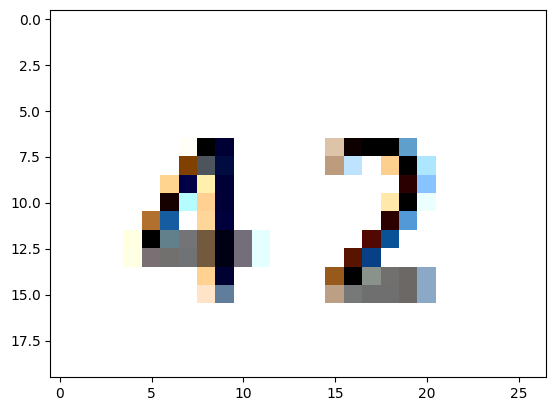

In [28]:
from skimage.io import imread

image = imread('42.png')
plt.imshow(image)

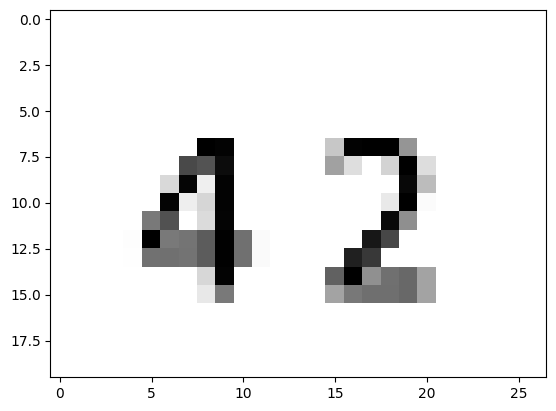

In [29]:
from skimage.color import rgb2gray, rgba2rgb

image = rgb2gray(rgba2rgb(image))
plt.imshow(image, cmap=plt.cm.gray)

Найдем координаты пикселей, содержащих информацию (то есть не белых).

In [30]:
point_coords = []

for row in range(image.shape[0]):
    for column in range(image.shape[1]):
        if not (image[row, column] == 1).all():
            point_coords.append([row, column])

point_coords = np.array(point_coords)
point_coords

array([[ 7,  7],
       [ 7,  8],
       [ 7,  9],
       [ 7, 15],
       [ 7, 16],
       [ 7, 17],
       [ 7, 18],
       [ 7, 19],
       [ 8,  7],
       [ 8,  8],
       [ 8,  9],
       [ 8, 15],
       [ 8, 16],
       [ 8, 18],
       [ 8, 19],
       [ 8, 20],
       [ 9,  6],
       [ 9,  7],
       [ 9,  8],
       [ 9,  9],
       [ 9, 19],
       [ 9, 20],
       [10,  6],
       [10,  7],
       [10,  8],
       [10,  9],
       [10, 18],
       [10, 19],
       [10, 20],
       [11,  5],
       [11,  6],
       [11,  8],
       [11,  9],
       [11, 18],
       [11, 19],
       [12,  4],
       [12,  5],
       [12,  6],
       [12,  7],
       [12,  8],
       [12,  9],
       [12, 10],
       [12, 11],
       [12, 17],
       [12, 18],
       [13,  4],
       [13,  5],
       [13,  6],
       [13,  7],
       [13,  8],
       [13,  9],
       [13, 10],
       [13, 11],
       [13, 16],
       [13, 17],
       [14,  8],
       [14,  9],
       [14, 15],
       [14, 16

Чтобы разделить цифры, используем кластеризацию.

Лучше всего для этой задачи подойдет алгоритм DBSCAN.

In [31]:
from sklearn.cluster import DBSCAN

points_clustered = DBSCAN(eps=2, min_samples=3).fit_predict(point_coords)
points_clustered

array([0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1], dtype=int64)

Визуализируем результата кластеризации.

Числа неправильно повернуты, так как оси координат на изображении направлены не так, как оси координат на графике. Но, в любом случае, видно, что DBSCAN успешно разделил цифры.

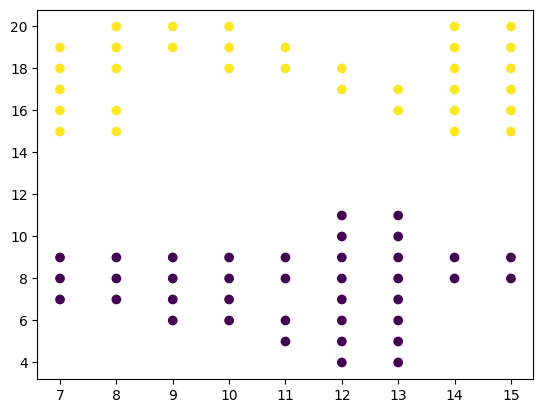

In [32]:
plt.scatter(point_coords[:, 0], point_coords[:, 1], c=points_clustered)

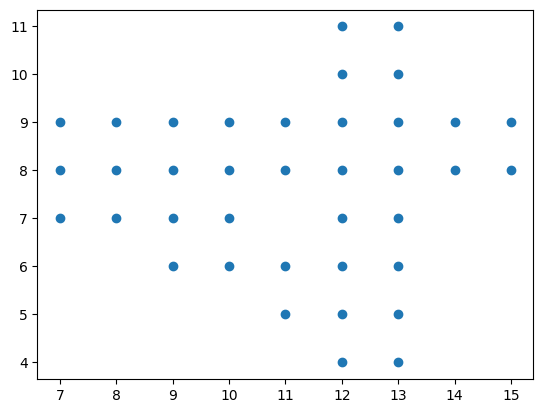

In [33]:
first_number = point_coords[points_clustered == 0]
plt.scatter(first_number[:, 0], first_number[:, 1])

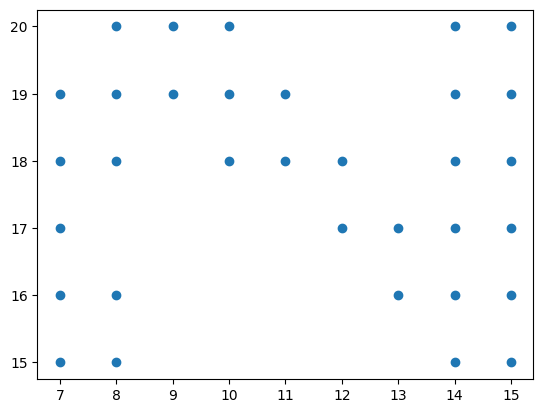

In [34]:
second_number = point_coords[points_clustered == 1]
plt.scatter(second_number[:, 0], second_number[:, 1])

По результатам кластеризации сформируем изображения отдельных цифр.

In [35]:
def coords_list_to_image(points):
    baseline = points.min(axis=0)
    points_baselined = points - baseline
    max_coords = (points_baselined.max(axis=0) + 1).tolist()
    result = np.full(max_coords, 1.0)
    for i in range(len(points)):
        result[points_baselined[i, 0], points_baselined[i, 1]] = image[points[i, 0], points[i, 1]]
    return result

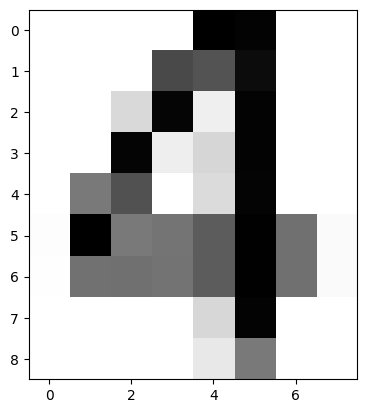

In [36]:
first_number_image = coords_list_to_image(first_number)
plt.imshow(first_number_image, cmap=plt.cm.gray)

In [37]:
first_number_image.shape

(9, 8)

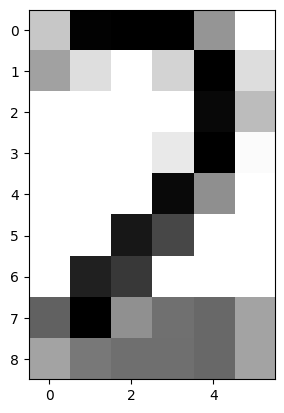

In [38]:
second_number_image = coords_list_to_image(second_number)
plt.imshow(second_number_image, cmap=plt.cm.gray)

In [39]:
second_number_image.shape

(9, 6)

В датасете digits размер изображений – (8, 8). Преобразуем изображения цифр к этому размеру.

In [40]:
def reshape_to_8_8(image):
    image_local = image
    if image_local.shape[0] < 8:
        rows_to_add = 8 - image_local.shape[0]
        rows = np.full((rows_to_add, image_local.shape[1]), 1.0)
        image_local = np.concatenate((image, rows), axis=0)
    if image_local.shape[1] < 8:
        columns_to_add = 8 - image_local.shape[1]
        columns = np.full((image_local.shape[0], columns_to_add), 1.0)
        image_local = np.concatenate((image, columns), axis=1)
    return image_local[:8, :8]

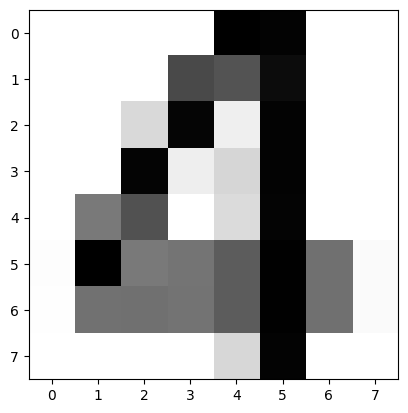

In [41]:
first_number_reshaped = reshape_to_8_8(first_number_image)
plt.imshow(first_number_reshaped, cmap=plt.cm.gray)

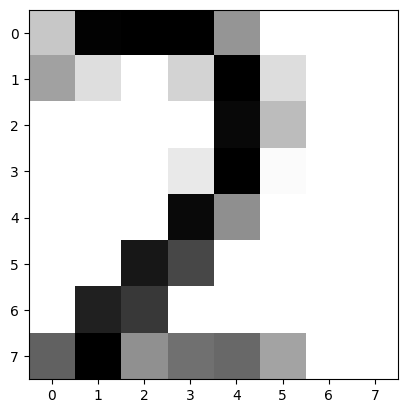

In [42]:
second_number_reshaped = reshape_to_8_8(second_number_image)
plt.imshow(second_number_reshaped, cmap=plt.cm.gray)

Отконвертируем цвета изображений в формат датасета digits.

In [43]:
def to_digits_format(image):
    result = np.empty((image.shape[0], image.shape[1]))
    for row in range(image.shape[0]):
        for column in range(image.shape[1]):
            result[row, column] = round((1 - image[row, column]) * 16)
    return result

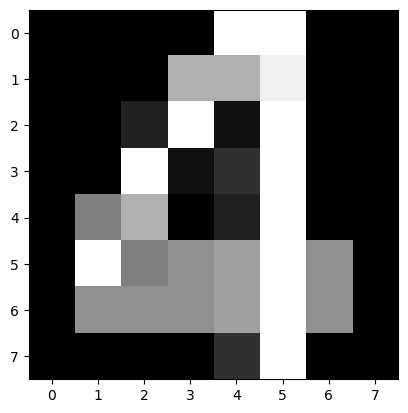

In [44]:
first_number_digits = to_digits_format(first_number_reshaped)
plt.imshow(first_number_digits, cmap=plt.cm.gray)

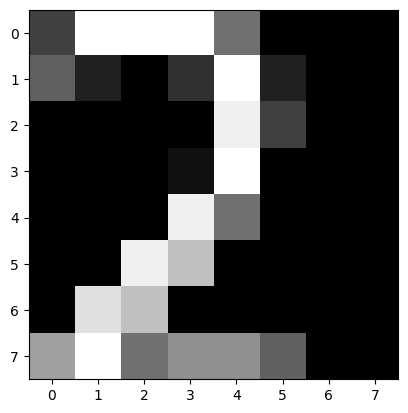

In [45]:
second_number_digits = to_digits_format(second_number_reshaped)
plt.imshow(second_number_digits, cmap=plt.cm.gray)

С помощью лучшего классификатора из предыдущего задания определим, каким цифрам соответствуют изображения.

In [46]:
def image_predict(image_digits):
    image_local = image_digits.flatten()[None,:]
    if best_tsne:
        image_local = x_tsne.transform(image_local)
    return best_algorithm.predict(image_local)

Классификатор правильно распознал изображения. Таким образом, мы правильно определили число на картинке.

In [47]:
first_number_prediction = image_predict(first_number_digits)[0]
first_number_prediction

4

In [48]:
second_number_prediction = image_predict(second_number_digits)[0]
second_number_prediction

2

In [49]:
result_number = first_number_prediction * 10 + second_number_prediction
result_number

42